In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt



(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split= ['train','test'],
    shuffle_files = True,
    as_supervised = True,
    with_info = True,

)











In [ ]:
def normalize_img(image,labels) :
  return tf.cast(image, tf.float32)/255, labels

ds_train = ds_train.map(normalize_img, num_parallel_calls= tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)



ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu') ,
    tf.keras.layers.Dense(10)

])



model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],



)


model.fit(
    ds_train,
    epochs=6,
    validation_data  =ds_test,
)


Epoch 1/6


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.6157 - sparse_categorical_accuracy: 0.8316 - val_loss: 0.2024 - val_sparse_categorical_accuracy: 0.9436
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1807 - sparse_categorical_accuracy: 0.9490 - val_loss: 0.1423 - val_sparse_categorical_accuracy: 0.9583
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1258 - sparse_categorical_accuracy: 0.9658 - val_loss: 0.1143 - val_sparse_categorical_accuracy: 0.9653
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0956 - sparse_categorical_accuracy: 0.9732 - val_loss: 0.1035 - val_sparse_categorical_accuracy: 0.9692
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0775 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.0872 - val_sparse_categorical_accuracy: 0.9718
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0863 - val_sparse_categorical_accuracy: 0.9751


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


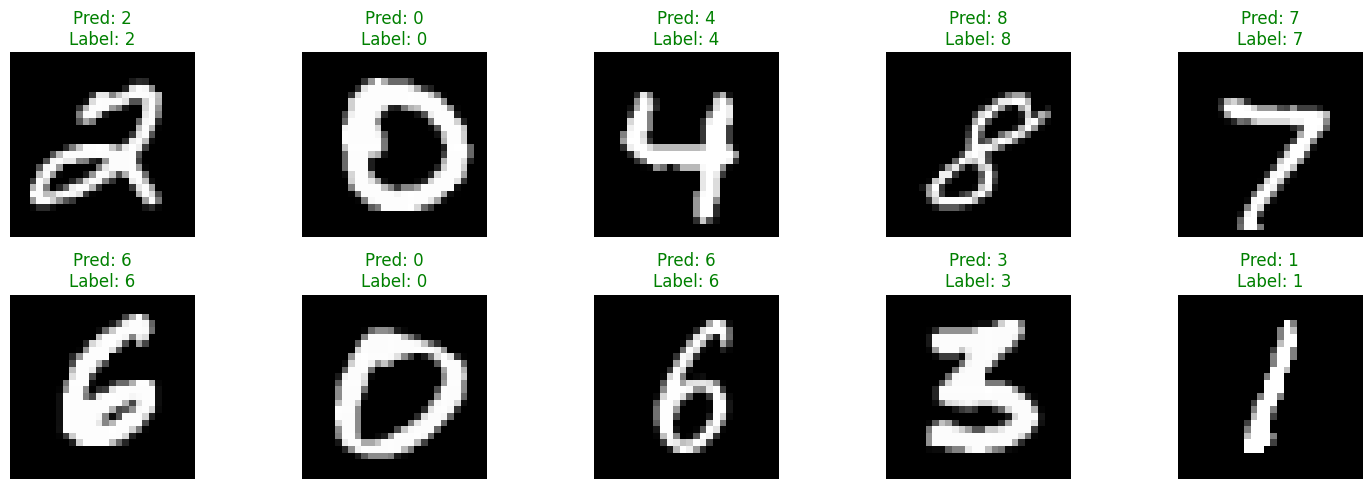

In [ ]:
def predictions(model, ds_test, n_samples = 10) :



  images, labels = next(iter(ds_test.unbatch().batch(n_samples)))
  logits = model.predict(images)
  predictions = tf.argmax(logits, axis = 1)  # argmax = choose the most correctly




  plt.figure(figsize=(15, 5))
  for i in range(n_samples):
      plt.subplot(2, 5, i + 1)

      plt.imshow(images[i], cmap='gray')
      plt.title(f"Pred: {predictions[i].numpy()}\nLabel: {labels[i].numpy()}",
                  color="green" if predictions[i] == labels[i] else "red")
      plt.axis('off')
  plt.tight_layout()
  plt.show()


predictions(model, ds_test)

